In [98]:
# import functions from modsim
from modsim import *
import random

#### **Variabel**
`pop_unesa` : jumlah populasi UNESA <br>
`pop_itts` : jumlah populasi ITTS <br>
`pop_other` : jumlah populasi OTHER <br>
`pop_swk` : jumlah populasi SWK <br>
`swk_max` : daya tampung maksimal SWK <br>
`bungkus` : jumlah orang yang bungkus <br>
`unesa_empty` : variabel bantuan untuk handling kalo UNESA kosong <br>
`itts_empty` : var bantuan untuk handling kalo ITTS empty <br>
`other_empty` : var bantuan untuk handling kalo OTHER empty <br>
`swk_empty` : var bantuan untuk handling untuk orang yang ingin ke swk tapi full<br>

#### **Observasi**
- per `10 menit` katakan ada yang `datang` `2-5 orang`
- per `30 menit` katakan ada yang `balik` `2-5 orang`
- per `30 menit` ada `4-10 orang` `bungkus`
- per `15 menit` `2-5 orang` `bungkus balik`

#### **Probabilitas Orang per Menit (&alpha;)** 
- 2-5 `orang` bakal `datang` 5menit `(0.2)`
- 2-5 `orang` bakal `balik` per 15menit `(0.07)`
- 4-10 `orang` bakal `bungkus` per 7.5menit `(0.13)`
- 2-5 `orang` yg `bungkus bakal ballik` per 15 menit `(0.07)`

In [99]:
def unesa_to_swk():
    # print('Anak UNESA otiwi SWK')
    people = rand_pick_datang()
    # kalo yang berangkat overload
    if (sim.unesa - people) < 0:
        selisih = abs(sim.unesa - people)
        # tambahkan empty sisa yang gak berangkat
        sim.unesa_empty += selisih
        # yang lain berangkat
        orang_berangkat = people - selisih
        if(sim.swk + orang_berangkat <= swk_max):
            sim.swk += orang_berangkat
            # posisi unesa jadi 0 
            sim.unesa = 0
    else:
        if(sim.swk + people <= swk_max):
            sim.swk += people
            sim.unesa -= people
        else:
            sim.swk_empty += people
    
def swk_to_unesa():
    people = rand_pick_balik()
    if sim.unesa == pop_unesa:
        return
    if sim.swk == 0:
        return
    if (sim.swk - people >= 0):
        sim.swk -= people
        sim.unesa += people
    
    

def itts_to_swk():
    people = rand_pick_datang()
    # kalo yang berangkat overload
    if (sim.itts - people) < 0:
        selisih = abs(sim.itts - people)
        # tambahkan empty sisa yang gak berangkat
        sim.itts_empty += selisih
        # yang lain berangkat
        orang_berangkat = people - selisih
        if(sim.swk + orang_berangkat <= swk_max):
            sim.swk += orang_berangkat
            # posisi itts jadi 0 
            sim.itts = 0
    else:
        if(sim.swk + people <= swk_max):
            sim.swk += people
            sim.itts -= people
        else:
            sim.swk_empty += people
            
def swk_to_itts():
    people = rand_pick_balik()
    if sim.itts == pop_itts:
        return
    if sim.swk == 0:
        return
    if (sim.swk - people >= 0):
        sim.swk -= people
        sim.itts += people

    
def other_to_swk():
    people = rand_pick_datang()
    # kalo yang berangkat overload
    if (sim.other - people) < 0:
        selisih = abs(sim.other - people)
        # tambahkan empty sisa yang gak berangkat
        sim.other_empty += selisih
        # yang lain berangkat
        orang_berangkat = people - selisih
        if(sim.swk + orang_berangkat <= swk_max):
            sim.swk += orang_berangkat
            # posisi other jadi 0 
            sim.other = 0
    else:
        if(sim.swk + people <= swk_max):
            sim.swk += people
            sim.other -= people
        else:
            sim.swk_empty += people
            
    
def swk_to_other():
    people = rand_pick_balik()
    if sim.other == pop_other:
        return
    if sim.swk == 0:
        return
    if (sim.swk - people >= 0):
        sim.swk -= people
        sim.other += people

def bungkus_datang():
    people = rand_pick_bungkus_datang()
    sim.everyone_bungkus += people
    
def bungkus_balik():
    people = rand_pick_bungkus_balik()
    if((sim.everyone_bungkus - people) >= 0):
        sim.everyone_bungkus -= people

In [100]:
pop_unesa = 70
pop_itts = 60
pop_other = 40
swk_max = 50
sim = State(unesa=pop_unesa, itts=pop_itts, other=pop_other, swk=0, swk_empty=0, unesa_empty=0, itts_empty=0, other_empty=0, everyone_bungkus=0)

In [101]:
prob_unit_datang = 0.2
prob_unit_balik = 0.07
prob_bungkus_datang = 0.13
prob_bungkus_balik = 0.07

#### **Model Matematis**
`prob_place` = (&alpha; * `pop_place`) / &Sigma; (&alpha; * `pop_place`) <br> 
1. `UNESA` = probabilitas datang * pop_unesa = 0.2 * 70 = `14 orang` <br>
2. `ITTS` = probabilitas datang * pop_itts = 0.2 * 60 = `12 orang` <br>
3. `Other` = probabilitas datang * pop_other = 0.2 * 40$ = `8 orang` <br>
4. `Total` = 14 + 12 + 8 = `34`
<br><br> dengan asumsi &alpha; minimum

In [102]:
def rand_pick_datang():
    return random.randrange(2,5)
def rand_pick_balik():
    return random.randrange(2,5)
def rand_pick_bungkus_datang():
    return random.randrange(4, 10)
def rand_pick_bungkus_balik():
    return random.randrange(2,5)

In [103]:
prob_unesa = (0.2 * pop_unesa) / 34
prob_itts = (0.2 * pop_itts) / 34
prob_other = (0.2 * pop_other) / 34
prob_bungkus = (prob_unesa+prob_itts+prob_other)/3

print(f"{prob_unesa}\t{prob_itts}\t{prob_other}\t{prob_bungkus}")

0.4117647058823529	0.35294117647058826	0.23529411764705882	0.3333333333333333


In [104]:
def step(prob_unesa, prob_itts, prob_other, prob_bungkus):
    if flip(prob_unesa):
        if flip(prob_unit_datang):
            unesa_to_swk()
        if flip(prob_unit_balik):
            swk_to_unesa()
    if flip(prob_itts):
        if flip(prob_unit_datang):
            itts_to_swk()
        if flip(prob_unit_balik):
            swk_to_itts()
    if flip(prob_other):
        if flip(prob_unit_datang):
            other_to_swk()
        if flip(prob_unit_balik):
            swk_to_other()
    if flip(prob_bungkus):
        if flip(prob_bungkus_datang):
            bungkus_datang()
        if flip(prob_bungkus_balik):
            bungkus_balik()


In [105]:
hasil1 = TimeSeries()
hasil2 = TimeSeries()
hasil3 = TimeSeries()
hasil4 = TimeSeries()
hasil5 = TimeSeries()
hasil6 = []

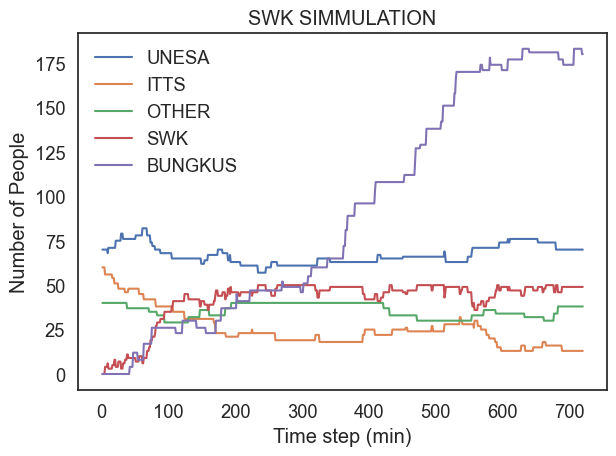

In [106]:
for i in range(720):
    # print(i)
    step(prob_unesa, prob_itts, prob_other, prob_bungkus)
    hasil1[i+1] = sim.unesa
    hasil2[i+1] = sim.itts
    hasil3[i+1] = sim.other
    hasil4[i+1] = sim.swk
    hasil5[i+1] = sim.everyone_bungkus
    hasil6.append(sim.swk_empty)
    
plt.plot(hasil1, label='UNESA')
plt.plot(hasil2, label='ITTS')
plt.plot(hasil3, label='OTHER')
plt.plot(hasil4, label='SWK')
plt.plot(hasil5, label='BUNGKUS')


decorate(title='SWK SIMMULATION',
         xlabel='Time step (min)', 
         ylabel='Number of People')


In [121]:
def run_simulation(p1, p2, p3, p4, num_steps, sim):
    state = sim
    for i in range(num_steps):
        step(p1, p2, p3, p4)
        
    return state

In [110]:
p1_array = hasil6
p1_array

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 7,
 7,
 7,
 11,
 11,
 11,
 11,


In [122]:
p1 = linspace(0, 0.6, 6)
p2 = linspace(0, 0.6, 6)
p3 = linspace(0, 0.6, 6)
p4 = linspace(0, 0.6, 6)
sweep = SweepSeries()
num_steps = 60

sim = State(unesa=pop_unesa, itts=pop_itts, other=pop_other, swk=0, swk_empty=0, unesa_empty=0, itts_empty=0, other_empty=0, everyone_bungkus=0)

for p in range(len(p1)):
    final_state = run_simulation(p1[p], p2[p], p3[p], p4[p], num_steps, sim)
    sweep[p1[p]] = final_state.swk_empty

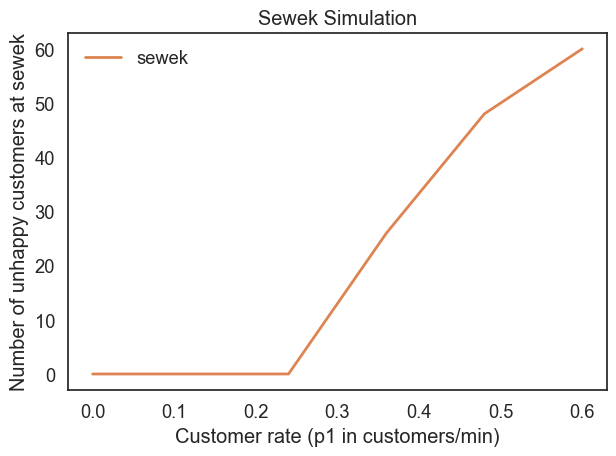

In [123]:
sweep.plot(label='sewek', color='C1')

decorate(title='Sewek Simulation',
         xlabel='Customer rate (p1 in customers/min)', 
         ylabel='Number of unhappy customers at sewek')